In [5]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utils
import os

In [24]:
num_agents = 200
num_iterations = 100
num_params = 25
params_names = ['CAThetaCutBarrel', 'CAThetaCutForward', 'dcaCutInnerTriplet', 'dcaCutOuterTriplet']
params_lb = [0.0, 0.0, 0.0, 0.0]
params_ub = [0.006, 0.03, 0.2, 1.0]

In [25]:
default = utils.read_csv("temp/default.csv")[0]
default_params = default[:num_params]
default_metrics = default[num_params:]

In [26]:
metrics = [pd.read_csv("history/iteration" + str(i) + ".csv", header=None, usecols=[num_params, num_params + 1]).transpose().to_numpy()
           for i in range(num_iterations)]


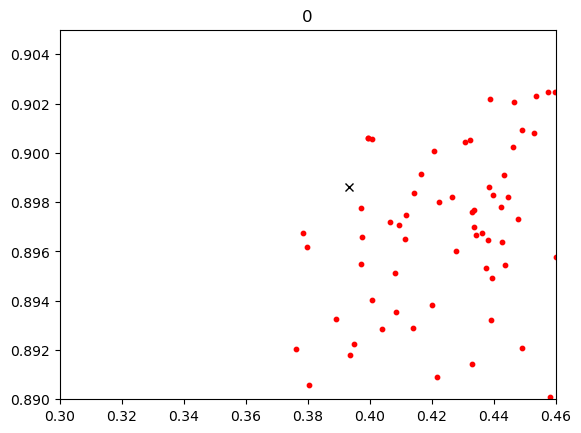

In [27]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim(0.3, 0.46)
    ax.set_ylim(0.89, 0.905)
    # s = ax.scatter(metrics[0][1], 1 - metrics[0][0], s=10)
    s = ax.scatter(metrics[i][1], 1 - metrics[i][0], c="red", s=10)
    # s = ax.scatter(metrics[num_iterations - 1][1], 1 - metrics[num_iterations - 1][0], c="green", s=10)
    s = ax.plot([default_metrics[1]], [1 - default_metrics[0]], 'x', color='black')
    # ax.set_xlabel(r'fakes $=\frac{(N_{rec}-N_{ass})}{N_{rec}}$')
    # ax.set_ylabel(r'eff $=\frac{N_{ass}}{N_{sim}}$')
    # ax.legend(loc='best')
    ax.set_title(str(i))

ani=animation.FuncAnimation(fig, animate, interval=200, frames=range(num_iterations))
ani.save('history/metrics.gif', writer='pillow')


In [28]:
pareto_front = utils.read_csv('checkpoint/pareto_front.csv')
pareto_front = pareto_front[pareto_front[:, num_params + 1].argsort()]
pareto_x = [particle[num_params + 1] for particle in pareto_front]

pareto_y = [1 - particle[num_params] for particle in pareto_front]
# pareto_z = [particle[6] for particle in pareto_front]
# pareto_t = [particle[5] + particle[6] for particle in pareto_front]

In [29]:
len(pareto_front)

321

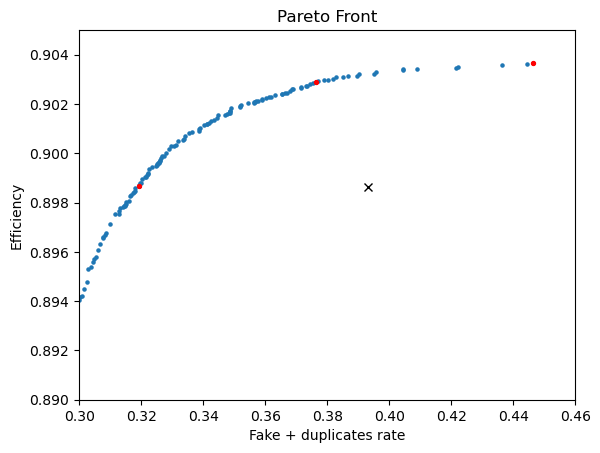

In [47]:
point1 = pareto_front[220]
point2 = pareto_front[300]
point3 = pareto_front[319]


plt.scatter(pareto_x, pareto_y, s=5)
plt.plot(default_metrics[1], 1 - default_metrics[0], 'x', color='black')
plt.scatter([point1[num_params + 1], point2[num_params + 1], point3[num_params + 1]], 
            [1 - point1[num_params], 1 - point2[num_params], 1 - point3[num_params]], color='red', s=8)
# plt.scatter([point1[5] + point1[6], point2[5] + point2[6], point3[5] + point3[6]], [1 - point1[4], 1 - point2[4], 1 - point3[4]], color='red', s=8)

# plt.scatter(point1[5], 1 - point1[4], color='red', s=8)
plt.xlim(0.3, 0.46)
plt.ylim(0.89, 0.905)
plt.xlabel("Fake + duplicates rate")
plt.ylabel("Efficiency")
plt.title("Pareto Front")
plt.savefig('../pf.png')
plt.show()


In [48]:
print([point1[i] for i in range(num_params)])
print([point2[i] for i in range(num_params)])
print([point3[i] for i in range(num_params)])

[0.00136011390557364, 0.001808451279436635, 0.09185977199129669, 0.3016971032624698, 0.6181658375856816, 15.254934099020552, 720.4709249086432, 509.8400995740833, 651.7499716211919, 400.0, 741.7865918392305, 402.6958769641575, 616.3649860954888, 981.3823301636965, 410.0378829671951, 408.4572932096296, 624.747969501158, 916.2471098368517, 609.2171519920437, 556.7481482288961, 666.7375495866552, 654.9020203087563, 764.2144950485067, 733.4434182100592, 551.8191122992542]
[0.001989332446501541, 0.004190351305035733, 0.1470585197765976, 0.48596603529033905, 0.47357702643232, 16.468391087128904, 765.0605481226881, 537.8436072538799, 654.7833808708623, 401.9864968780076, 594.0832111939724, 509.24660259983426, 677.41311460553, 925.3513778416869, 516.5933919546195, 515.633165422192, 753.0274398470026, 937.6883576963397, 755.159253062185, 656.0367405615946, 736.4621375220777, 685.2728087389379, 936.3858358929825, 751.9076347919944, 533.0138192188231]
[0.002503977610178747, 0.006027738109209355, 

In [49]:
selected_params = [default_params, point1[:num_params], point2[:num_params], point3[:num_params]]
# selected_params

In [50]:
utils.write_csv('MTV/selected_params.csv', selected_params)

In [51]:
print(point1)
print(point2)
print(point3)

[1.36011391e-03 1.80845128e-03 9.18597720e-02 3.01697103e-01
 6.18165838e-01 1.52549341e+01 7.20470925e+02 5.09840100e+02
 6.51749972e+02 4.00000000e+02 7.41786592e+02 4.02695877e+02
 6.16364986e+02 9.81382330e+02 4.10037883e+02 4.08457293e+02
 6.24747970e+02 9.16247110e+02 6.09217152e+02 5.56748148e+02
 6.66737550e+02 6.54902020e+02 7.64214495e+02 7.33443418e+02
 5.51819112e+02 1.01311736e-01 3.19209325e-01]
[1.98933245e-03 4.19035131e-03 1.47058520e-01 4.85966035e-01
 4.73577026e-01 1.64683911e+01 7.65060548e+02 5.37843607e+02
 6.54783381e+02 4.01986497e+02 5.94083211e+02 5.09246603e+02
 6.77413115e+02 9.25351378e+02 5.16593392e+02 5.15633165e+02
 7.53027440e+02 9.37688358e+02 7.55159253e+02 6.56036741e+02
 7.36462138e+02 6.85272809e+02 9.36385836e+02 7.51907635e+02
 5.33013819e+02 9.71214681e-02 3.76562573e-01]
[2.50397761e-03 6.02773811e-03 1.67804506e-01 7.69471758e-01
 2.92397661e-01 1.76269264e+01 7.01356463e+02 6.70454301e+02
 7.11754679e+02 4.53567121e+02 5.14558325e+02 6.6869

In [44]:
# for i in range(num_agents):
#     uproot_file = uproot.open("test.root")
#     tree = uproot_file['simpleValidation' + str(i)]['output']
#     total_rec = tree['rt'].array()[0]
#     total_ass = tree['at'].array()[0]
#     total_ass_sim = tree['ast'].array()[0]
#     total_dup = tree['dt'].array()[0]
#     total_sim = tree['st'].array()[0]
#     print("st: %d, ast: %d, rt: %d, at: %d, dt: %d, eff: %.5f, fake+dup: %.5f" % (total_sim, total_ass_sim, total_rec, total_ass, total_dup, total_ass_sim / total_sim, (total_rec - total_ass + total_dup) / total_rec))



In [57]:
import subprocess
def reco_and_validate(params):
    if not os.path.exists("temp"):
        os.mkdir("temp")
    utils.write_csv("temp/parameters.csv", params)
    validation_result = "temp/simple_validation.root"
    subprocess.run(['cmsRun','reconstruction.py', "inputFile=file:input/step2.root", "nEvents=1000",
                     "parametersFile=temp/parameters.csv", "outputFile=" + validation_result])
    num_particles = len(params)
    with uproot.open(validation_result) as uproot_file:
        population_fitness = np.array([utils.get_metrics(uproot_file, i) for i in range(num_particles)])
    return population_fitness

In [ ]:
reco_and_validate(selected_params)